# "This product uses the TMDB API but is not endorsed or certified by TMDB."



In [1]:
!pip install spacy
from spacy.cli import download
download('en_core_web_sm')


KeyboardInterrupt: 

In [1]:
## Import necessary packages
import pandas as pd
import nltk

In [2]:
# Import the Data
df = pd.read_csv('Data-NLP/movie_reviews_v2.csv')
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       8650 non-null   object 
 1   movie_id        8650 non-null   int64  
 2   imdb_id         8650 non-null   object 
 3   original_title  8650 non-null   object 
 4   review          8650 non-null   object 
 5   rating          7454 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 405.6+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
## Check class balance of 'rating'
df['rating'].value_counts(normalize=True)

7.0     0.211430
6.0     0.185940
8.0     0.168903
5.0     0.098202
9.0     0.082640
10.0    0.075664
4.0     0.068956
1.0     0.038100
3.0     0.034076
2.0     0.020526
7.5     0.003622
8.5     0.003086
6.5     0.002951
9.5     0.002012
0.5     0.001342
5.5     0.000805
3.5     0.000537
4.5     0.000537
1.5     0.000402
2.5     0.000268
Name: rating, dtype: float64

In [7]:
df['lower_text'] = df['review'].str.lower()
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,lower_text
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,this is a fine piece of cinema from wong kar-w...
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,"a guilty pleasure for me personally, as i love..."
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,made my roommate who hates stop-motion animati...
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,a very good stop-motion animation!\r\n\r\n<em>...
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,"ok, there is an huge temptation to riddle this..."


In [8]:
df['tokens'] = df['lower_text'].str.split()
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,lower_text,tokens
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,this is a fine piece of cinema from wong kar-w...,"[this, is, a, fine, piece, of, cinema, from, w..."
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,"a guilty pleasure for me personally, as i love...","[a, guilty, pleasure, for, me, personally,, as..."
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,made my roommate who hates stop-motion animati...,"[made, my, roommate, who, hates, stop-motion, ..."
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,a very good stop-motion animation!\r\n\r\n<em>...,"[a, very, good, stop-motion, animation!, <em>'..."
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,"ok, there is an huge temptation to riddle this...","[ok,, there, is, an, huge, temptation, to, rid..."


In [14]:
# Create Groups for new Target Rating Column
def create_groups(x):
    if x>=9.0:
        return "high-rating"
    elif x <=4.0:
        return "low-rating"
    else: 
        return None

In [15]:
## Use the function to create a new "target" column with groups
df['target'] = df['rating'].map(create_groups)
df['target'].value_counts(dropna=False)

None           6231
low-rating     1224
high-rating    1195
Name: target, dtype: int64

# SpaCY

In [16]:
import spacy

In [17]:
## Load the model.  Disable Named Entity Recognizer (too slow)
nlp_model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
nlp_model.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [18]:
doc = nlp_model(df['review'][5])
doc

This is a decent enough mindless action movie with a lot of over the top action but it is not really a Mission Impossible movie. The movie starts of reasonably well being somewhat intelligent with a bit of Mission Impossible feel to it. It is actually almost a bit slow at times. However, for the second half of the movie it really degrades into a classical John Woo, over the top, action feast with all pretense of intelligence and any true Mission Impossible feel gone. John Woo is not the right person to make a Mission Impossible movie.

As with the first movie if it would not have been labelled Mission Impossible I would probably have given it a higher rating since it is a decent enough, mostly braindead though, Hollywood action movie. However, I have higher expectations from a movie labelled Mission Impossible.

Tom Cruise is quite okay as Ethan Hunt. Dougray Scott is okayish as the bad guy. Sometimes he projects the right big bad and mad bad-guy attitude but sometimes he is just silly

In [19]:
## Display the tokens in the document
[token for token in doc]

[This,
 is,
 a,
 decent,
 enough,
 mindless,
 action,
 movie,
 with,
 a,
 lot,
 of,
 over,
 the,
 top,
 action,
 but,
 it,
 is,
 not,
 really,
 a,
 Mission,
 Impossible,
 movie,
 .,
 The,
 movie,
 starts,
 of,
 reasonably,
 well,
 being,
 somewhat,
 intelligent,
 with,
 a,
 bit,
 of,
 Mission,
 Impossible,
 feel,
 to,
 it,
 .,
 It,
 is,
 actually,
 almost,
 a,
 bit,
 slow,
 at,
 times,
 .,
 However,
 ,,
 for,
 the,
 second,
 half,
 of,
 the,
 movie,
 it,
 really,
 degrades,
 into,
 a,
 classical,
 John,
 Woo,
 ,,
 over,
 the,
 top,
 ,,
 action,
 feast,
 with,
 all,
 pretense,
 of,
 intelligence,
 and,
 any,
 true,
 Mission,
 Impossible,
 feel,
 gone,
 .,
 John,
 Woo,
 is,
 not,
 the,
 right,
 person,
 to,
 make,
 a,
 Mission,
 Impossible,
 movie,
 .,
 
 ,
 As,
 with,
 the,
 first,
 movie,
 if,
 it,
 would,
 not,
 have,
 been,
 labelled,
 Mission,
 Impossible,
 I,
 would,
 probably,
 have,
 given,
 it,
 a,
 higher,
 rating,
 since,
 it,
 is,
 a,
 decent,
 enough,
 ,,
 mostly,
 braindead

In [20]:
## Isolate the last token in the document
word = doc[-1]

## Display the text and type of the token
print(word)
type(word)

.


spacy.tokens.token.Token

In [21]:
## Display the lemmatized form of the token
word.lemma_

'.'

In [22]:
## Check whether the token is punctuation
word.is_punct

True

In [23]:
## Check whether the token is a space
word.is_space

False

In [24]:
## Check the part of speech of the token
word.pos_

'PUNCT'

In [25]:
[token.pos_ for token in doc]

['DET',
 'AUX',
 'DET',
 'ADJ',
 'ADJ',
 'ADJ',
 'NOUN',
 'NOUN',
 'ADP',
 'DET',
 'NOUN',
 'ADP',
 'ADP',
 'DET',
 'ADJ',
 'NOUN',
 'CCONJ',
 'PRON',
 'AUX',
 'PART',
 'ADV',
 'DET',
 'PROPN',
 'ADJ',
 'NOUN',
 'PUNCT',
 'DET',
 'NOUN',
 'VERB',
 'ADP',
 'ADV',
 'ADV',
 'AUX',
 'ADV',
 'ADJ',
 'ADP',
 'DET',
 'NOUN',
 'ADP',
 'PROPN',
 'PROPN',
 'VERB',
 'ADP',
 'PRON',
 'PUNCT',
 'PRON',
 'AUX',
 'ADV',
 'ADV',
 'DET',
 'NOUN',
 'ADJ',
 'ADP',
 'NOUN',
 'PUNCT',
 'ADV',
 'PUNCT',
 'ADP',
 'DET',
 'ADJ',
 'NOUN',
 'ADP',
 'DET',
 'NOUN',
 'PRON',
 'ADV',
 'VERB',
 'ADP',
 'DET',
 'ADJ',
 'PROPN',
 'PROPN',
 'PUNCT',
 'ADP',
 'DET',
 'NOUN',
 'PUNCT',
 'NOUN',
 'NOUN',
 'ADP',
 'DET',
 'NOUN',
 'ADP',
 'NOUN',
 'CCONJ',
 'DET',
 'ADJ',
 'PROPN',
 'PROPN',
 'VERB',
 'ADJ',
 'PUNCT',
 'PROPN',
 'PROPN',
 'AUX',
 'PART',
 'DET',
 'ADJ',
 'NOUN',
 'PART',
 'VERB',
 'DET',
 'PROPN',
 'ADJ',
 'NOUN',
 'PUNCT',
 'SPACE',
 'ADP',
 'ADP',
 'DET',
 'ADJ',
 'NOUN',
 'SCONJ',
 'PRON',
 'AUX',
 'PA

In [26]:
## [v1: List Comp] Make a list of the lemmas for each token in the document
[token.lemma_ for token in doc]

['this',
 'be',
 'a',
 'decent',
 'enough',
 'mindless',
 'action',
 'movie',
 'with',
 'a',
 'lot',
 'of',
 'over',
 'the',
 'top',
 'action',
 'but',
 'it',
 'be',
 'not',
 'really',
 'a',
 'Mission',
 'impossible',
 'movie',
 '.',
 'the',
 'movie',
 'start',
 'of',
 'reasonably',
 'well',
 'be',
 'somewhat',
 'intelligent',
 'with',
 'a',
 'bit',
 'of',
 'Mission',
 'Impossible',
 'feel',
 'to',
 'it',
 '.',
 'it',
 'be',
 'actually',
 'almost',
 'a',
 'bit',
 'slow',
 'at',
 'time',
 '.',
 'however',
 ',',
 'for',
 'the',
 'second',
 'half',
 'of',
 'the',
 'movie',
 'it',
 'really',
 'degrade',
 'into',
 'a',
 'classical',
 'John',
 'Woo',
 ',',
 'over',
 'the',
 'top',
 ',',
 'action',
 'feast',
 'with',
 'all',
 'pretense',
 'of',
 'intelligence',
 'and',
 'any',
 'true',
 'Mission',
 'Impossible',
 'feel',
 'gone',
 '.',
 'John',
 'Woo',
 'be',
 'not',
 'the',
 'right',
 'person',
 'to',
 'make',
 'a',
 'Mission',
 'impossible',
 'movie',
 '.',
 '\r\n\r\n',
 'as',
 'with',
 'th

In [27]:
lemmas_list = []
for token in doc:
    lemmas_list.append( token.lemma_)
lemmas_list

['this',
 'be',
 'a',
 'decent',
 'enough',
 'mindless',
 'action',
 'movie',
 'with',
 'a',
 'lot',
 'of',
 'over',
 'the',
 'top',
 'action',
 'but',
 'it',
 'be',
 'not',
 'really',
 'a',
 'Mission',
 'impossible',
 'movie',
 '.',
 'the',
 'movie',
 'start',
 'of',
 'reasonably',
 'well',
 'be',
 'somewhat',
 'intelligent',
 'with',
 'a',
 'bit',
 'of',
 'Mission',
 'Impossible',
 'feel',
 'to',
 'it',
 '.',
 'it',
 'be',
 'actually',
 'almost',
 'a',
 'bit',
 'slow',
 'at',
 'time',
 '.',
 'however',
 ',',
 'for',
 'the',
 'second',
 'half',
 'of',
 'the',
 'movie',
 'it',
 'really',
 'degrade',
 'into',
 'a',
 'classical',
 'John',
 'Woo',
 ',',
 'over',
 'the',
 'top',
 ',',
 'action',
 'feast',
 'with',
 'all',
 'pretense',
 'of',
 'intelligence',
 'and',
 'any',
 'true',
 'Mission',
 'Impossible',
 'feel',
 'gone',
 '.',
 'John',
 'Woo',
 'be',
 'not',
 'the',
 'right',
 'person',
 'to',
 'make',
 'a',
 'Mission',
 'impossible',
 'movie',
 '.',
 '\r\n\r\n',
 'as',
 'with',
 'th

In [28]:
[token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]

['this',
 'be',
 'a',
 'decent',
 'enough',
 'mindless',
 'action',
 'movie',
 'with',
 'a',
 'lot',
 'of',
 'over',
 'the',
 'top',
 'action',
 'but',
 'it',
 'be',
 'not',
 'really',
 'a',
 'mission',
 'impossible',
 'movie',
 'the',
 'movie',
 'start',
 'of',
 'reasonably',
 'well',
 'be',
 'somewhat',
 'intelligent',
 'with',
 'a',
 'bit',
 'of',
 'mission',
 'impossible',
 'feel',
 'to',
 'it',
 'it',
 'be',
 'actually',
 'almost',
 'a',
 'bit',
 'slow',
 'at',
 'time',
 'however',
 'for',
 'the',
 'second',
 'half',
 'of',
 'the',
 'movie',
 'it',
 'really',
 'degrade',
 'into',
 'a',
 'classical',
 'john',
 'woo',
 'over',
 'the',
 'top',
 'action',
 'feast',
 'with',
 'all',
 'pretense',
 'of',
 'intelligence',
 'and',
 'any',
 'true',
 'mission',
 'impossible',
 'feel',
 'gone',
 'john',
 'woo',
 'be',
 'not',
 'the',
 'right',
 'person',
 'to',
 'make',
 'a',
 'mission',
 'impossible',
 'movie',
 'as',
 'with',
 'the',
 'first',
 'movie',
 'if',
 'it',
 'would',
 'not',
 'hav

In [29]:
lemmas_list = []
for token in doc:
    if token.is_punct:
        continue
    if token.is_space:
        continue

    lemmas_list.append(token.lemma_.lower())

lemmas_list

['this',
 'be',
 'a',
 'decent',
 'enough',
 'mindless',
 'action',
 'movie',
 'with',
 'a',
 'lot',
 'of',
 'over',
 'the',
 'top',
 'action',
 'but',
 'it',
 'be',
 'not',
 'really',
 'a',
 'mission',
 'impossible',
 'movie',
 'the',
 'movie',
 'start',
 'of',
 'reasonably',
 'well',
 'be',
 'somewhat',
 'intelligent',
 'with',
 'a',
 'bit',
 'of',
 'mission',
 'impossible',
 'feel',
 'to',
 'it',
 'it',
 'be',
 'actually',
 'almost',
 'a',
 'bit',
 'slow',
 'at',
 'time',
 'however',
 'for',
 'the',
 'second',
 'half',
 'of',
 'the',
 'movie',
 'it',
 'really',
 'degrade',
 'into',
 'a',
 'classical',
 'john',
 'woo',
 'over',
 'the',
 'top',
 'action',
 'feast',
 'with',
 'all',
 'pretense',
 'of',
 'intelligence',
 'and',
 'any',
 'true',
 'mission',
 'impossible',
 'feel',
 'gone',
 'john',
 'woo',
 'be',
 'not',
 'the',
 'right',
 'person',
 'to',
 'make',
 'a',
 'mission',
 'impossible',
 'movie',
 'as',
 'with',
 'the',
 'first',
 'movie',
 'if',
 'it',
 'would',
 'not',
 'hav

In [30]:
[token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]

['decent',
 'mindless',
 'action',
 'movie',
 'lot',
 'action',
 'mission',
 'impossible',
 'movie',
 'movie',
 'start',
 'reasonably',
 'somewhat',
 'intelligent',
 'bit',
 'mission',
 'impossible',
 'feel',
 'actually',
 'bit',
 'slow',
 'time',
 'second',
 'half',
 'movie',
 'degrade',
 'classical',
 'john',
 'woo',
 'action',
 'feast',
 'pretense',
 'intelligence',
 'true',
 'mission',
 'impossible',
 'feel',
 'gone',
 'john',
 'woo',
 'right',
 'person',
 'mission',
 'impossible',
 'movie',
 'movie',
 'label',
 'mission',
 'impossible',
 'probably',
 'give',
 'high',
 'rating',
 'decent',
 'braindead',
 'hollywood',
 'action',
 'movie',
 'high',
 'expectation',
 'movie',
 'label',
 'mission',
 'impossible',
 'tom',
 'cruise',
 'okay',
 'ethan',
 'hunt',
 'dougray',
 'scott',
 'okayish',
 'bad',
 'guy',
 'project',
 'right',
 'big',
 'bad',
 'mad',
 'bad',
 'guy',
 'attitude',
 'silly',
 'action',
 'scene',
 'suppose',
 'mastermind',
 'come',
 'thug',
 'la',
 'intelligent',
 'drug'

In [31]:
## [v3 For Loop - Continue] Make a list of only the tokens in the document that are not punctuation or spaces 
## Lower the casing as well
lemmas_list = []
for token in doc:
    if token.is_punct:
        continue
    if token.is_space:
        continue
    if token.is_stop:
        continue

    lemmas_list.append(token.lemma_.lower())

lemmas_list

['decent',
 'mindless',
 'action',
 'movie',
 'lot',
 'action',
 'mission',
 'impossible',
 'movie',
 'movie',
 'start',
 'reasonably',
 'somewhat',
 'intelligent',
 'bit',
 'mission',
 'impossible',
 'feel',
 'actually',
 'bit',
 'slow',
 'time',
 'second',
 'half',
 'movie',
 'degrade',
 'classical',
 'john',
 'woo',
 'action',
 'feast',
 'pretense',
 'intelligence',
 'true',
 'mission',
 'impossible',
 'feel',
 'gone',
 'john',
 'woo',
 'right',
 'person',
 'mission',
 'impossible',
 'movie',
 'movie',
 'label',
 'mission',
 'impossible',
 'probably',
 'give',
 'high',
 'rating',
 'decent',
 'braindead',
 'hollywood',
 'action',
 'movie',
 'high',
 'expectation',
 'movie',
 'label',
 'mission',
 'impossible',
 'tom',
 'cruise',
 'okay',
 'ethan',
 'hunt',
 'dougray',
 'scott',
 'okayish',
 'bad',
 'guy',
 'project',
 'right',
 'big',
 'bad',
 'mad',
 'bad',
 'guy',
 'attitude',
 'silly',
 'action',
 'scene',
 'suppose',
 'mastermind',
 'come',
 'thug',
 'la',
 'intelligent',
 'drug'

In [32]:
## [V1 List Comp] Define a function to use spacy to process our text
def spacy_process(text):
        """Lemmatize tokens, lower case, remove punctuation, spaces, and stop words"""
        doc = nlp_model(text)
        processed_doc = [token.lemma_.lower() for token in doc if not token.is_punct and 
                         not token.is_space and not token.is_stop and 
                         not 'http' in token.lemma_.lower() and 'www' not in token.lemma_.lower()]
        return processed_doc

## process the tweets using the spacy function
df['spacy_lemmas'] = df['review'].apply(spacy_process)
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,lower_text,tokens,target,spacy_lemmas
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,this is a fine piece of cinema from wong kar-w...,"[this, is, a, fine, piece, of, cinema, from, w...",None,"[fine, piece, cinema, wong, kar, wai, tell, st..."
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,"a guilty pleasure for me personally, as i love...","[a, guilty, pleasure, for, me, personally,, as...",high-rating,"[guilty, pleasure, personally, love, great, es..."
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,made my roommate who hates stop-motion animati...,"[made, my, roommate, who, hates, stop-motion, ...",None,"[roommate, hate, stop, motion, animation, watc..."
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,a very good stop-motion animation!\r\n\r\n<em>...,"[a, very, good, stop-motion, animation!, <em>'...",None,"[good, stop, motion, animation, <, em>'chicken..."
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,"ok, there is an huge temptation to riddle this...","[ok,, there, is, an, huge, temptation, to, rid...",None,"[ok, huge, temptation, riddle, review, pun, go..."


In [33]:
## Check class balance of 'rating'
df['target'].value_counts(normalize=True)

low-rating     0.505994
high-rating    0.494006
Name: target, dtype: float64

In [34]:
# Create new column for finding average word counts for real and fake articles
df['length'] = df['tokens'].map(len)
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,lower_text,tokens,target,spacy_lemmas,length
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,this is a fine piece of cinema from wong kar-w...,"[this, is, a, fine, piece, of, cinema, from, w...",None,"[fine, piece, cinema, wong, kar, wai, tell, st...",266
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,"a guilty pleasure for me personally, as i love...","[a, guilty, pleasure, for, me, personally,, as...",high-rating,"[guilty, pleasure, personally, love, great, es...",41
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,made my roommate who hates stop-motion animati...,"[made, my, roommate, who, hates, stop-motion, ...",None,"[roommate, hate, stop, motion, animation, watc...",57
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,a very good stop-motion animation!\r\n\r\n<em>...,"[a, very, good, stop-motion, animation!, <em>'...",None,"[good, stop, motion, animation, <, em>'chicken...",135
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,"ok, there is an huge temptation to riddle this...","[ok,, there, is, an, huge, temptation, to, rid...",None,"[ok, huge, temptation, riddle, review, pun, go...",206


In [35]:
## Divide documents by sentiment
high = df.loc[df['target'] == 'high-rating']
low = df.loc[df['target'] == 'low-rating']
print('high-rating')
display(high.head())
print('low-rating')
display(low.head())

high-rating


,review_id,movie_id,imdb_id,original_title,review,rating,lower_text,tokens,target,spacy_lemmas,length
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,"a guilty pleasure for me personally, as i love...","[a, guilty, pleasure, for, me, personally,, as...",high-rating,"[guilty, pleasure, personally, love, great, es...",41
15,608e2744d8cc4a0058dc4272,2621,tt0122459,Return to Me,"Okay, I will admit I can be a bit of an easy g...",9.0,"okay, i will admit i can be a bit of an easy g...","[okay,, i, will, admit, i, can, be, a, bit, of...",high-rating,"[okay, admit, bit, easy, grader, come, romanti...",200
21,5570c897c3a368709c000bca,2787,tt0134847,Pitch Black,All you people are so scared of me. Most days ...,9.0,all you people are so scared of me. most days ...,"[all, you, people, are, so, scared, of, me., m...",high-rating,"[people, scared, day, compliment, be, got, to,...",677
22,5b92026d0e0a26609c005caa,2787,tt0134847,Pitch Black,One of those few movies that most people don't...,9.0,one of those few movies that most people don't...,"[one, of, those, few, movies, that, most, peop...",high-rating,"[movie, people, care, personally, think, crimi...",30
24,5f98ecffae36680036bc7170,2787,tt0134847,Pitch Black,The movie that put Vin Diesel on the map as Ri...,9.0,the movie that put vin diesel on the map as ri...,"[the, movie, that, put, vin, diesel, on, the, ...",high-rating,"[movie, vin, diesel, map, riddick, crooked, an...",32


low-rating


,review_id,movie_id,imdb_id,original_title,review,rating,lower_text,tokens,target,spacy_lemmas,length
6,57b2d23dc3a36837d7000b14,955,tt0120755,Mission: Impossible II,"The first underwhelmed me, but this one straig...",3.0,"the first underwhelmed me, but this one straig...","[the, first, underwhelmed, me,, but, this, one...",low-rating,"[underwhelme, straight, bore, course, see, hun...",120
7,5e9120963679a10018375490,955,tt0120755,Mission: Impossible II,After quite entertainign Mission Impossible I ...,2.0,after quite entertainign mission impossible i ...,"[after, quite, entertainign, mission, impossib...",low-rating,"[entertainign, mission, impossible, second, in...",94
20,6409202f0e441900e887a17b,4234,tt0134084,Scream 3,**_Scream 3’s_ lackluster screenplay and unima...,4.0,**_scream 3’s_ lackluster screenplay and unima...,"[**_scream, 3’s_, lackluster, screenplay, and,...",low-rating,"[scream, 3, lackluster, screenplay, unimaginat...",387
31,63578ba8c8a2d4008a00ff77,12211,tt0144964,Highlander: Endgame,**There should have been only one!**\r\n\r\nIf...,1.0,**there should have been only one!**\r\n\r\nif...,"[**there, should, have, been, only, one!**, if...",low-rating,"[highlander, 2, complete, disgrace, highlander...",372
51,6110271465e0a2002683d2b6,479,tt0162650,Shaft,_**A black detective in Gotham desperately wan...,4.0,_**a black detective in gotham desperately wan...,"[_**a, black, detective, in, gotham, desperate...",low-rating,"[black, detective, gotham, desperately, want, ...",263


In [36]:
high_len = high['length'].median()
high_len

161.0

In [37]:
low_len = low['length'].median()
low_len

132.5

In [38]:
# Find average length for fake and real articles
df['length'].mean()

233.04254335260114

In [42]:
## Save the processed data
df.to_csv('Data-NLP/processed_data.csv', index=False)

In [43]:
## Save the processed data - as a joblib
import joblib
joblib.dump(df,'Data-NLP/processed_data.joblib')

['Data-NLP/processed_data.joblib']

# Frequency Distribution

In [44]:
# Import FreqDist
from nltk.probability import FreqDist

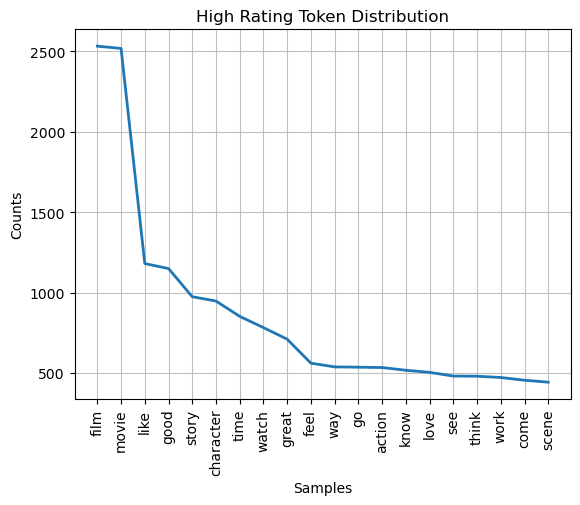

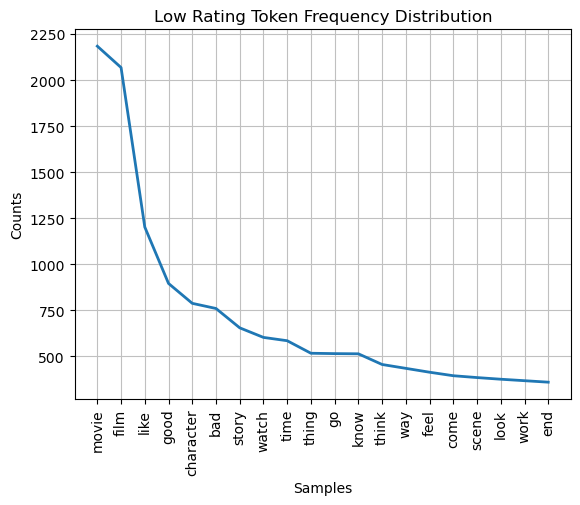

In [45]:
## Create list of all tokens in all documents
high_rating = high['spacy_lemmas'].explode().to_list()
low_rating = low['spacy_lemmas'].explode().to_list()

## Instantiate high frequency distribution
high_freq_dist = FreqDist(high_rating)
low_freq_dist = FreqDist(low_rating)

## Plot the distribution
high_freq_dist.plot(20, title='High Rating Token Distribution')

low_freq_dist.plot(20, title='Low Rating Token Frequency Distribution');

# Word Clouds

In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [47]:
## Join the original text for each group
high_review_joined = " ".join(high['review'])
low_review_joined = " ".join(low['review'])

In [48]:
def plot_wordclouds(high_cloud, low_cloud, title='Comparing Word Usage'):
    """Plots the wordlcouds for our two groups"""
    ## Plot the Images
    fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
    axes[0].imshow(high_cloud)
    axes[0].set_title('High Rating')
    axes[0].axis('off')
    
    axes[1].imshow(low_cloud)
    axes[1].set_title('Low Rating')
    axes[1].axis('off')
    fig.tight_layout()
    
    fig.suptitle(title,y=1.0, fontsize='xx-large');
    return fig

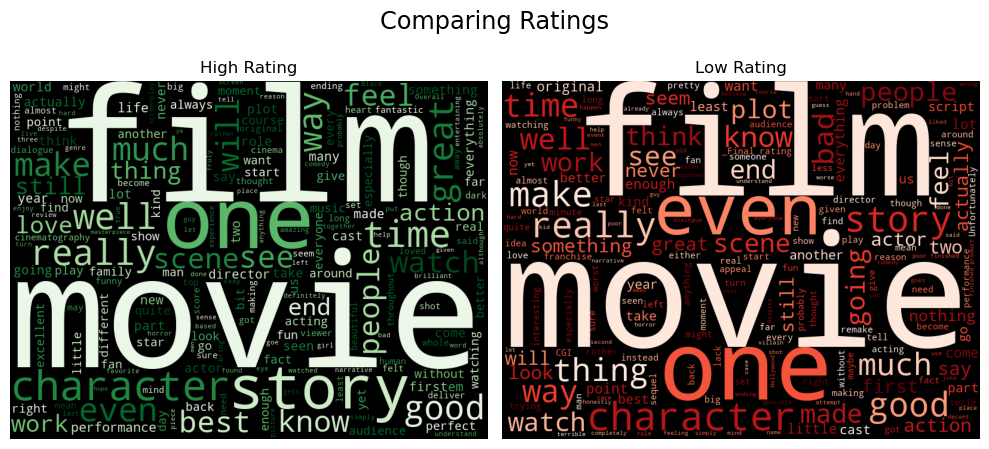

In [49]:
## Generate the WordCloud Images
wordcloud_kws = dict(min_word_length=2,width=800, height=600, random_state=42)
high_cloud = WordCloud(**wordcloud_kws, colormap='Greens').generate(high_review_joined)
low_cloud = WordCloud(**wordcloud_kws, colormap='Reds').generate(low_review_joined)

fig = plot_wordclouds(high_cloud, low_cloud, title="Comparing Ratings")


In [50]:
## Join the words for each sentiment
all_high_lemmas = ' '.join(high_rating)
all_low_lemmas = ' '.join(low_rating)
type(all_high_lemmas)

str

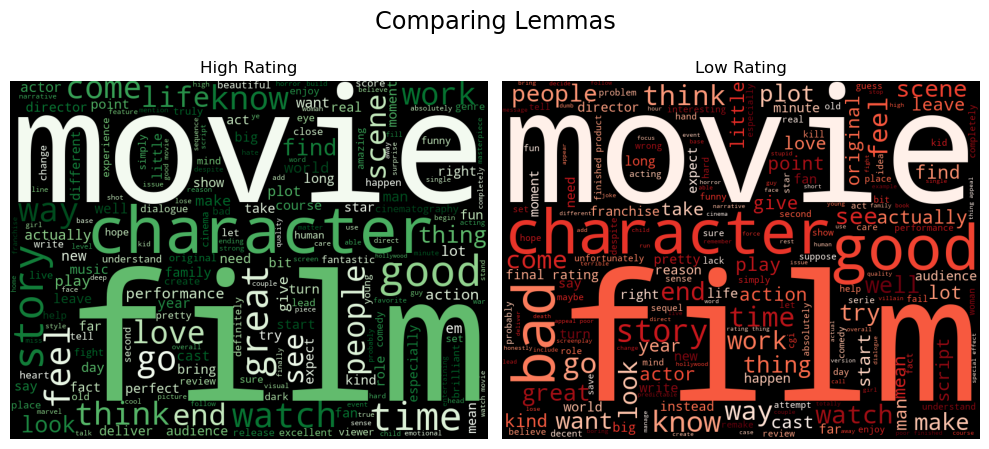

In [51]:
## Generate the WordCloud Images
# wordcloud_kws = dict(min_word_length=2,width=800, height=600, )
high_cloud = WordCloud(**wordcloud_kws, colormap='Greens').generate(all_high_lemmas)
low_cloud = WordCloud(**wordcloud_kws, colormap='Reds').generate(all_low_lemmas)

## Plot the Images
fig = plot_wordclouds(high_cloud, low_cloud, title='Comparing Lemmas')

# N-gram Analysis

In [54]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

## Create measure classes
measures = BigramAssocMeasures()

## Create collector classes
high_finder = BigramCollocationFinder.from_words(high_rating)
low_finder = BigramCollocationFinder.from_words(low_rating)

In [55]:
## Calculate high-rating ngram scores
high_ngram_scores = high_finder.score_ngrams(measures.raw_freq)

# Save as a dataframe
high_ngram_scores_df = pd.DataFrame(high_ngram_scores, columns=['high ngram', 'high score'])


## Calculate low-rating ngram scores
low_ngram_scores = low_finder.score_ngrams(measures.raw_freq)
low_ngram_scores_df = pd.DataFrame(low_ngram_scores, columns=['low ngram', 'low score'])

## Display the frequency scores
display(high_ngram_scores_df.head(20),low_ngram_scores_df.head(20))

,high ngram,high score
0,"(feel, like)",0.000809
1,"(good, movie)",0.000702
2,"(watch, movie)",0.000644
3,"(good, film)",0.000523
4,"(comic, book)",0.000494
5,"(action, movie)",0.000458
6,"(movie, like)",0.000458
7,"(special, effect)",0.000422
8,"(like, movie)",0.000408
9,"(main, character)",0.000408


,low ngram,low score
0,"(feel, like)",0.001182
1,"(final, rating)",0.001129
2,"(rating, ★)",0.001129
3,"(★, ★)",0.001032
4,"(finished, product)",0.000847
5,"(look, like)",0.000847
6,"(appeal, poor)",0.000838
7,"(poor, finished)",0.000838
8,"(thing, appeal)",0.000838
9,"(★, thing)",0.000838


In [56]:
top_20_ngrams_high = high_ngram_scores_df.set_index("high ngram").head(20)
top_20_ngrams_high

,high score
high ngram,
"(feel, like)",0.000809
"(good, movie)",0.000702
"(watch, movie)",0.000644
"(good, film)",0.000523
"(comic, book)",0.000494
"(action, movie)",0.000458
"(movie, like)",0.000458
"(special, effect)",0.000422
"(like, movie)",0.000408


In [57]:
top_20_ngrams_low = low_ngram_scores_df.set_index("low ngram").head(20)
top_20_ngrams_low

,low score
low ngram,
"(feel, like)",0.001182
"(final, rating)",0.001129
"(rating, ★)",0.001129
"(★, ★)",0.001032
"(finished, product)",0.000847
"(look, like)",0.000847
"(appeal, poor)",0.000838
"(poor, finished)",0.000838
"(thing, appeal)",0.000838


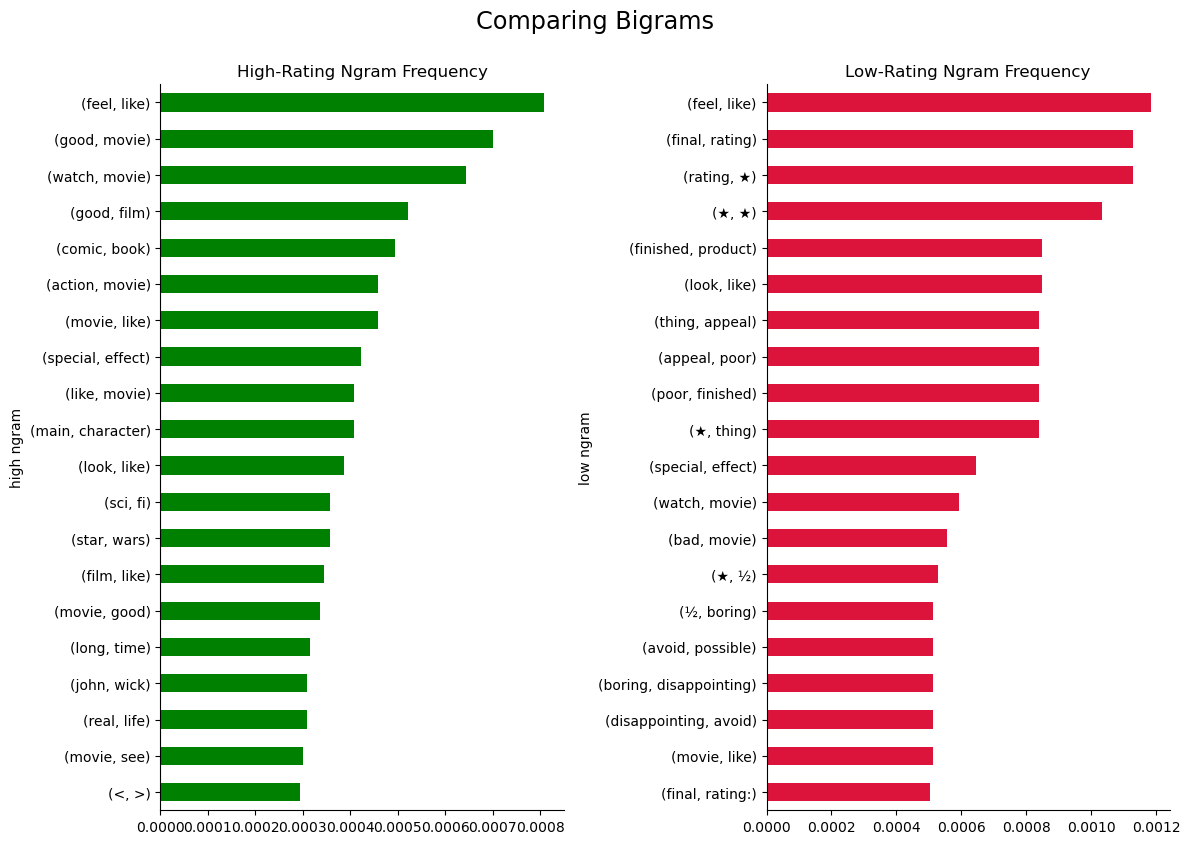

In [58]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
## Plot the ngram frequencies
top_20_ngrams_high["high score"].sort_values().plot(
    kind="barh", title="High-Rating Ngram Frequency", ax=axes[0], color="green"
)

top_20_ngrams_low["low score"].sort_values().plot(
    kind="barh", title="Low-Rating Ngram Frequency", color="crimson", ax=axes[1]
)
# Remove lines from top and right edges (spines)
for ax in axes:
    ax.spines["top"].set_visible(False)  # Remove the top spine
    ax.spines["right"].set_visible(False)  # Remove the right spine

fig.tight_layout()
fig.suptitle("Comparing Bigrams", y=1.05, fontsize="xx-large");

In [59]:
def plot_group_ngrams( low_ngram_scores, high_ngram_scores, 
                       plot_col_low="low score",top_n=20,
                      plot_col_high="high score",figsize=(12, 8),):
    # Get top n ngrams for both groups (set index for easier pandas plotting)
    top_n_ngrams_high = high_ngram_scores.set_index("high ngram").head(top_n)
    top_n_ngrams_low = low_ngram_scores.set_index("low ngram").head(top_n)

    ## Plot the ngram frequencies
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    #
    top_n_ngrams_high[plot_col_high].sort_values().plot(
        kind="barh", title="High-Rating Ngram Frequency", ax=axes[0], color="green"
    )

    top_n_ngrams_low[plot_col_low].sort_values().plot(
        kind="barh", title="Low-Rating Ngram Frequency", color="crimson", ax=axes[1]
    )
    for ax in axes:
        ax.spines["top"].set_visible(False)  # Remove the top spine
        ax.spines["right"].set_visible(False)  # Remove the right spine

    fig.tight_layout()
    return fig

In [61]:
import seaborn as sns

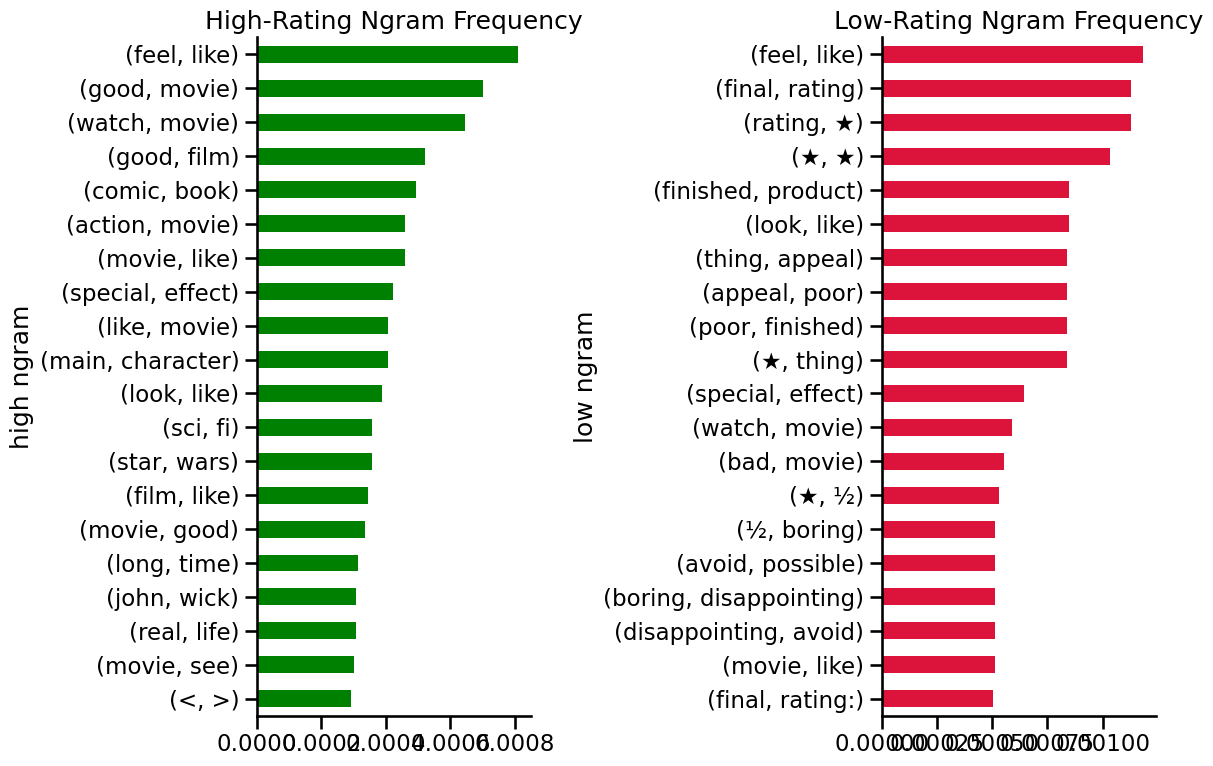

In [62]:
with sns.plotting_context('talk'):
    fig = plot_group_ngrams(low_ngram_scores_df, high_ngram_scores_df)

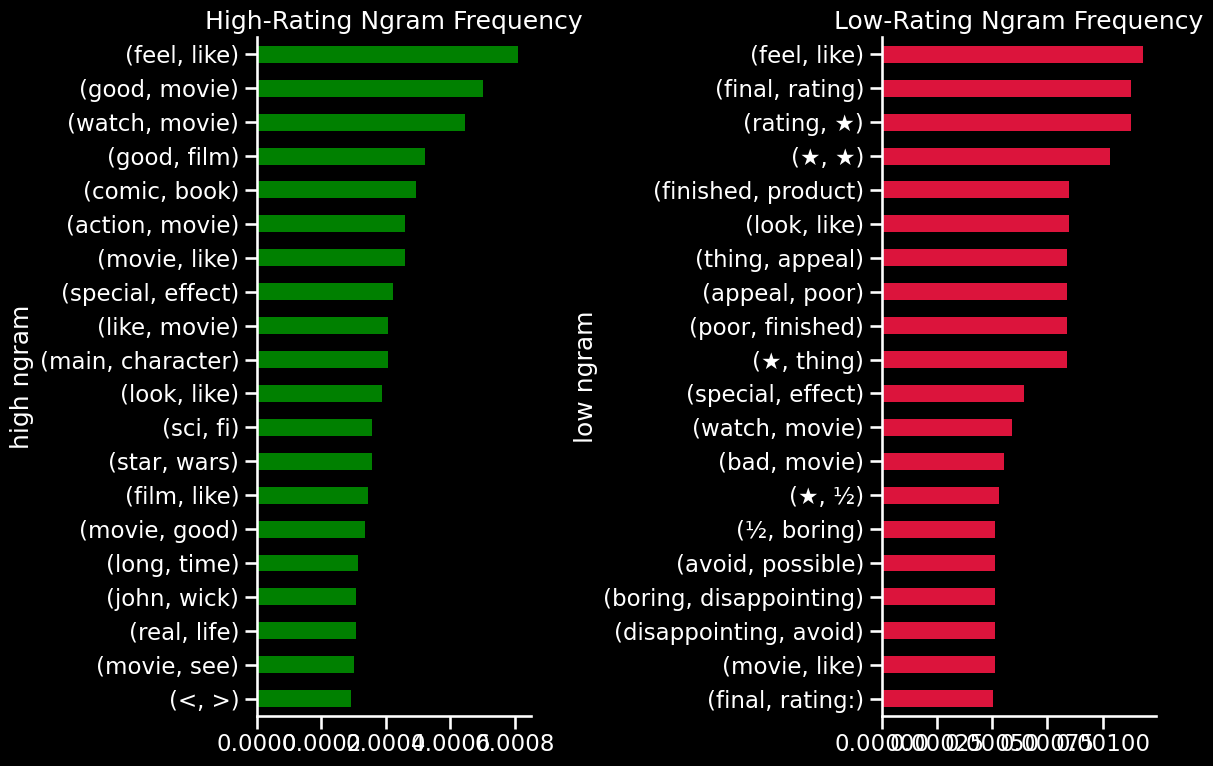

In [63]:
with plt.style.context(['dark_background',]):
    with sns.plotting_context("talk"):
        fig = plot_group_ngrams(low_ngram_scores_df, high_ngram_scores_df)

# Analysis
- High Rating Reviews are associated with movies being: Likeable, Able to Feel Emotion and Good Story.
- Low Rating Reviews are associated with movies being: Not likeable, Already bad professional reviews and low appeal/relatable. 